In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/creditcard_clean_dataset.csv')

In [ ]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


EDA

In [ ]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
df.describe(include='object')

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


In [ ]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

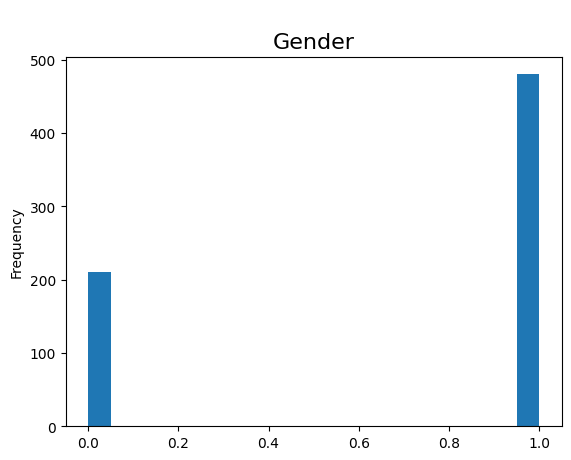

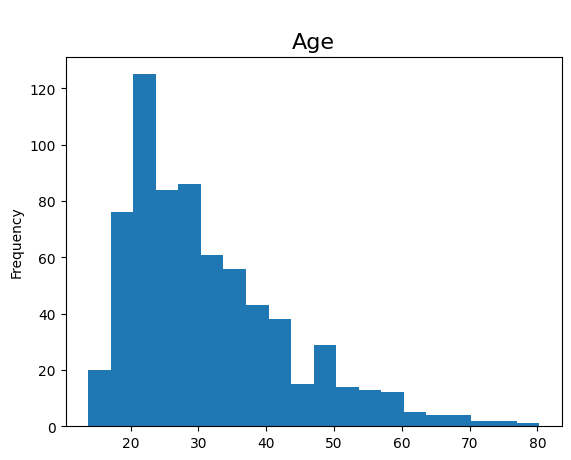

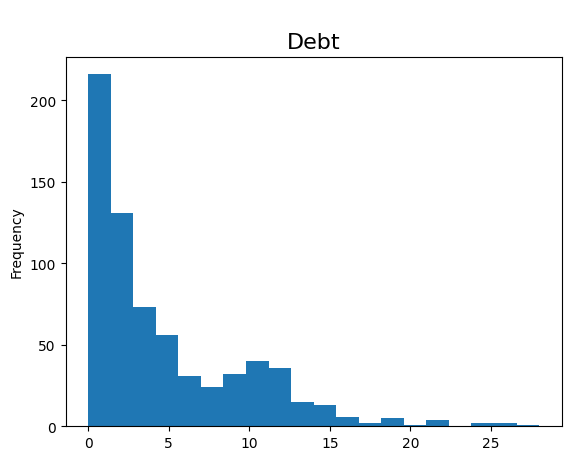

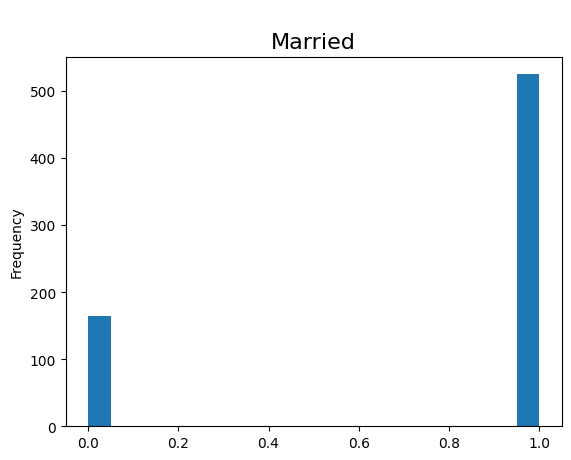

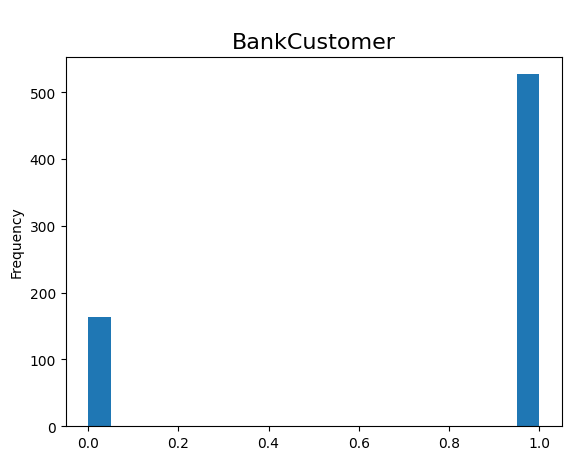

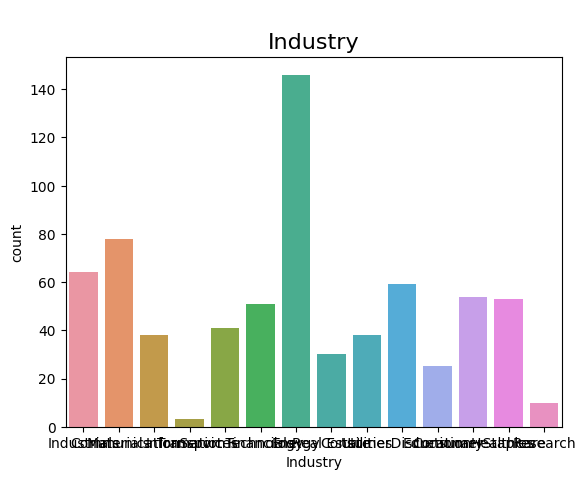

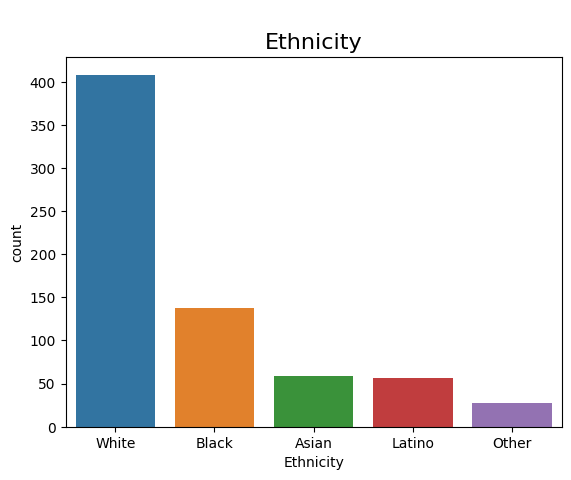

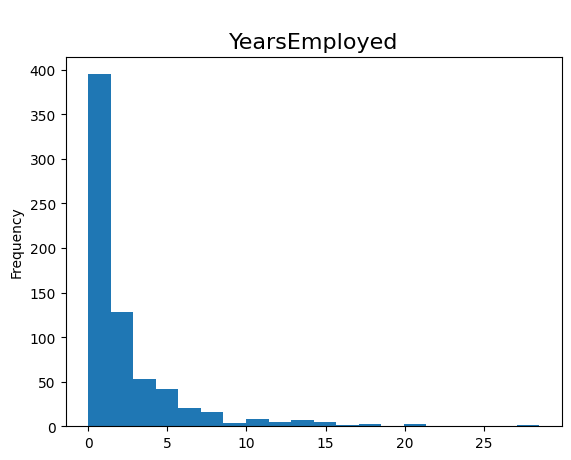

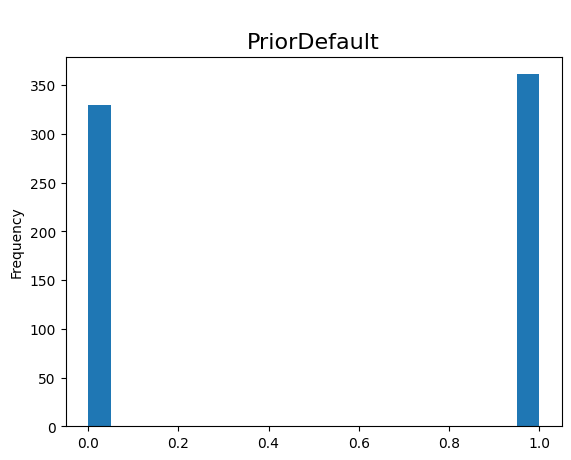

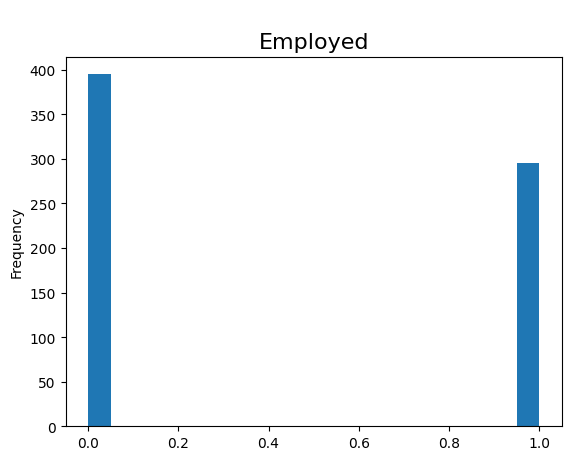

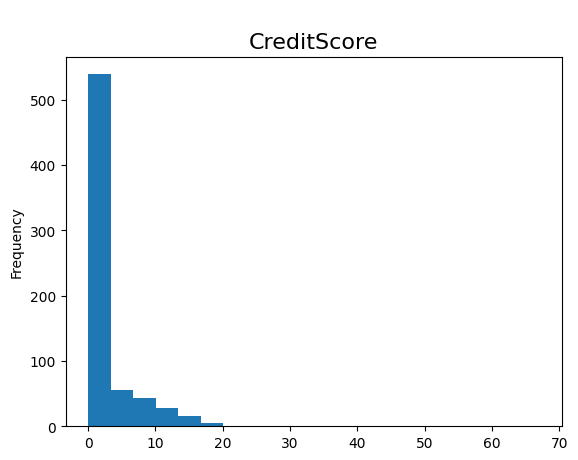

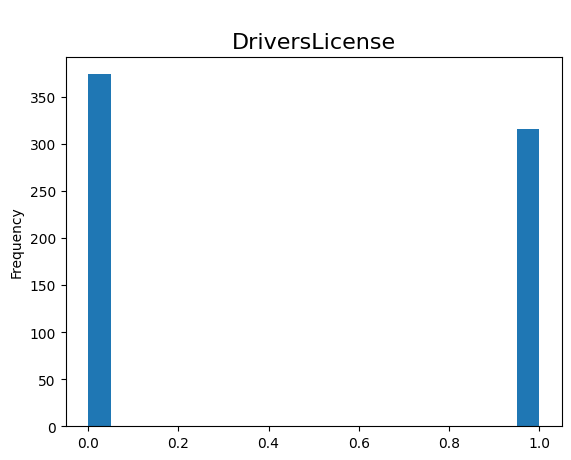

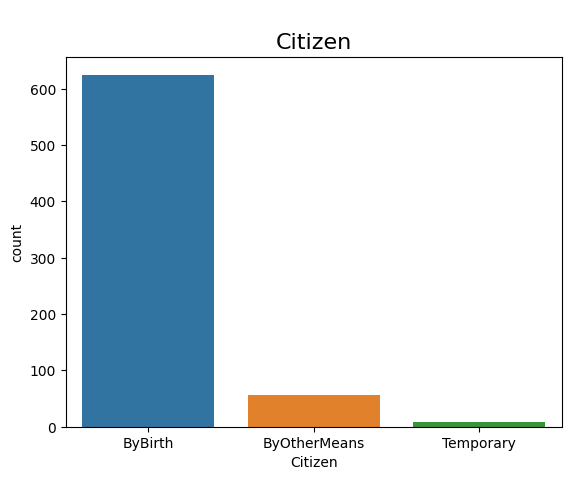

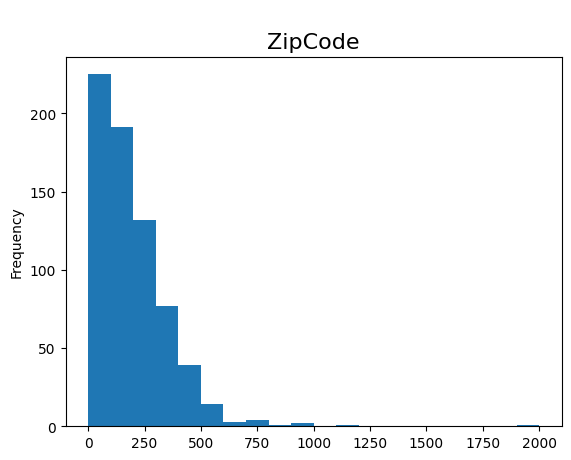

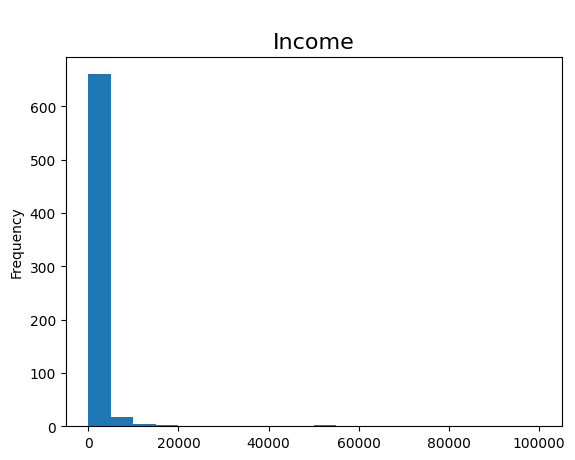

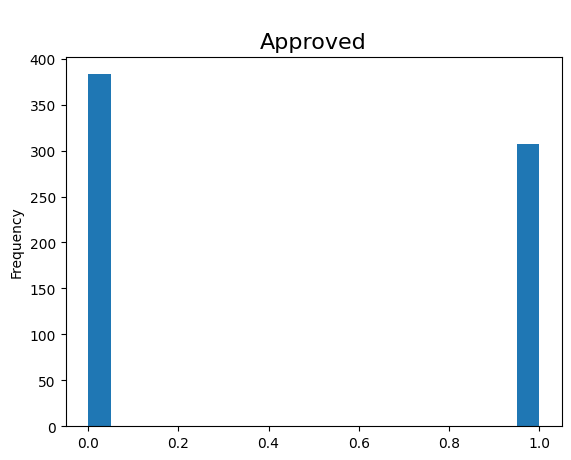

In [ ]:
for feat in df.columns:
  if df[feat].dtype =='object':
    sns.countplot(data=df, x = feat)
  else:
    df[feat].plot(kind='hist', bins=20)
  plt.title('\n' +feat, fontsize=16)
  plt.show()

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    print(df[feat].value_counts())
    print('♦' *20)

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64
♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦
White     408
Black     138
Asian      59
Latino     57
Other      28
Name: Ethnicity, dtype: int64
♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦
ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64
♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦♦


<Axes: >

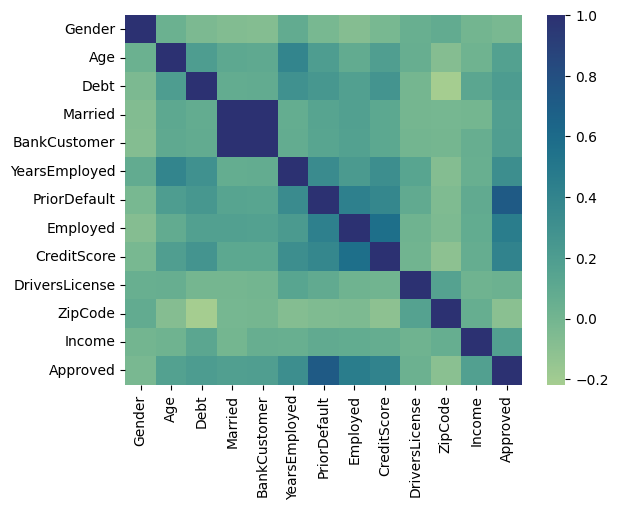

In [ ]:
sns.heatmap(df.corr(), cmap='crest')

In [ ]:
df.corrwith(df['Approved']).sort_values()

ZipCode          -0.099598
Gender           -0.028934
DriversLicense    0.031625
Age               0.164086
Income            0.175657
Married           0.180583
BankCustomer      0.188964
Debt              0.206294
YearsEmployed     0.322475
CreditScore       0.406410
Employed          0.458301
PriorDefault      0.720407
Approved          1.000000
dtype: float64

**Preprocessing**
Handling Outliers


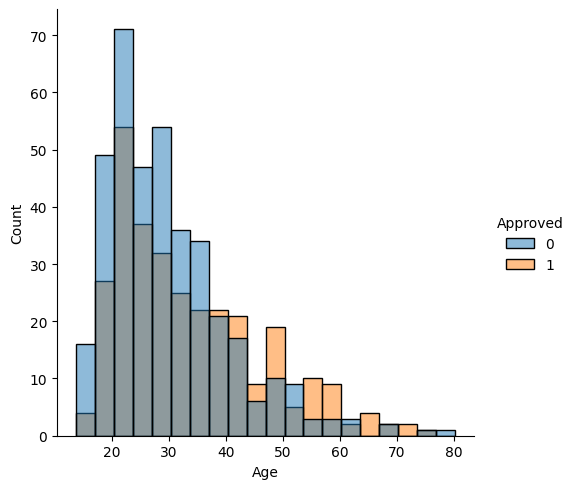

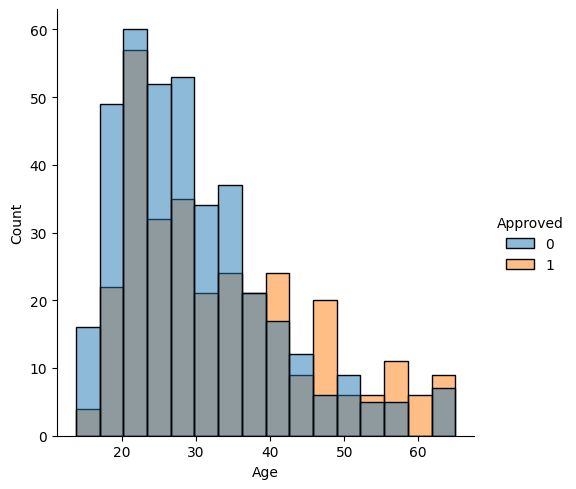

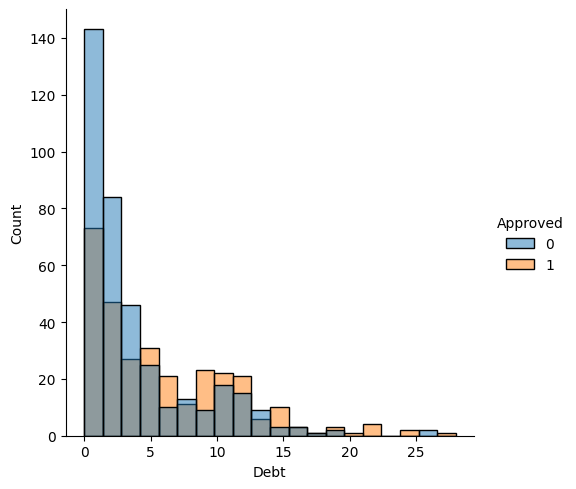

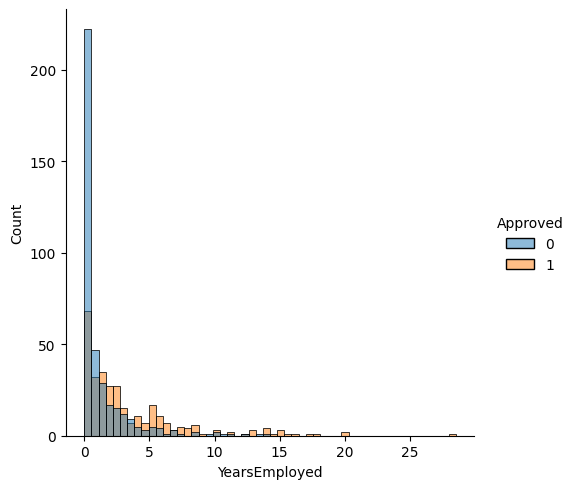

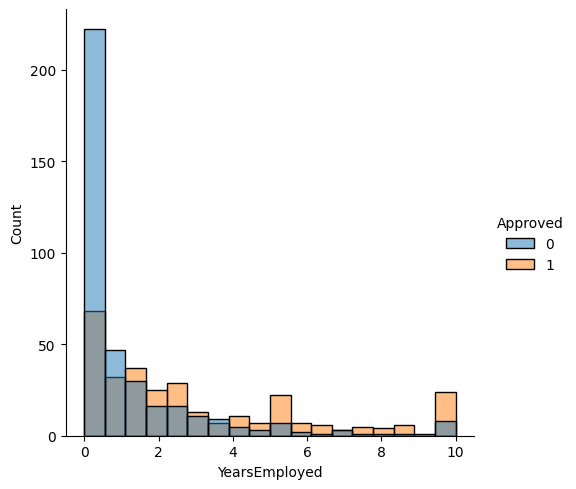

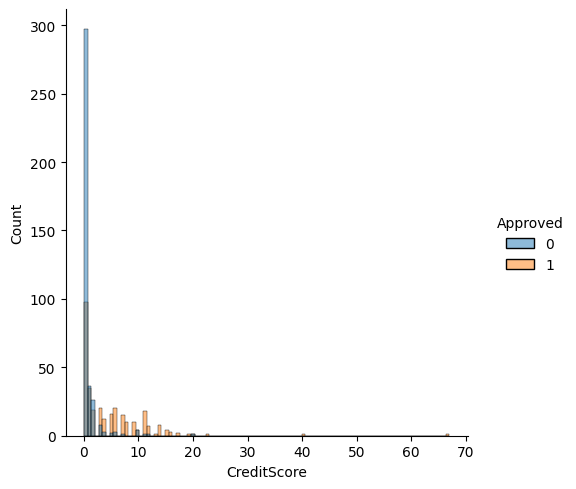

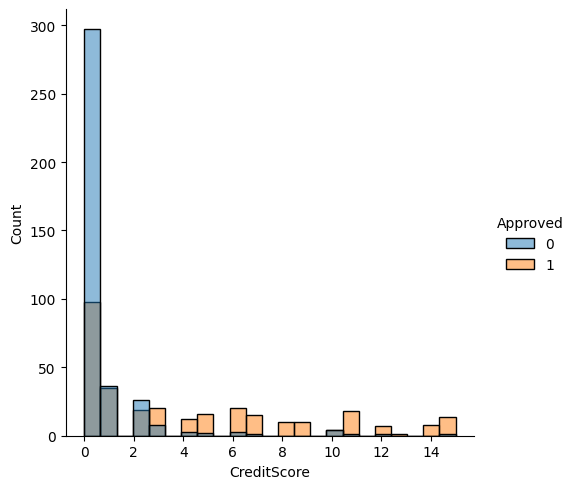

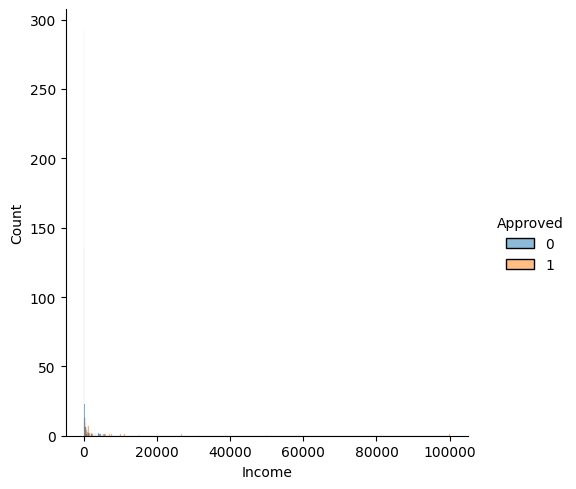

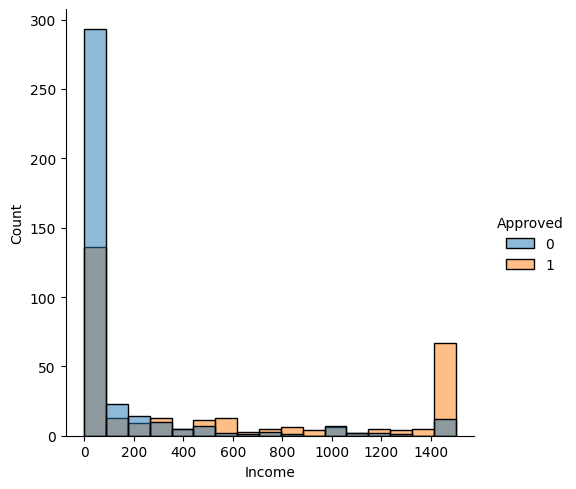

In [ ]:
sns.displot(df, x='Age', hue='Approved')
df['Age'] = df['Age'].clip(upper=65)
sns.displot(df, x='Age', hue='Approved')
sns.displot(df, x='Debt', hue='Approved')
sns.displot(df, x='YearsEmployed', hue='Approved')
df['YearsEmployed'] = df['YearsEmployed'].clip(upper=10)
sns.displot(df, x='YearsEmployed', hue='Approved')
sns.displot(df, x='CreditScore', hue='Approved')
df['CreditScore'] = df['CreditScore'].clip(upper=15)
sns.displot(df, x='CreditScore', hue='Approved')
sns.displot(df, x='Income', hue='Approved')
df['Income'] = df['Income'].clip(upper=1500)
sns.displot(df, x='Income', hue='Approved')


Dummies


In [ ]:
df.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [ ]:
cat_feats = ['Gender', 'Married', 'Citizen', 'Industry','Ethnicity']

In [ ]:
df = pd.get_dummies(df, columns=cat_feats)

Train test split

In [ ]:
df.columns

Index(['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income',
       'Approved', 'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White'],
      dtype='object')

In [ ]:
features = ['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense',  'Income',#'ZipCode',
       'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White']
target = ['Approved']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Modeling

In [ ]:
log = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_train = log.predict(X_train)
y_pred_test = log.predict(X_test)

In [ ]:
score_train = log.score(X_train,y_train)
score_test = log.score(X_test,y_test)

Confusion Matix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def confusion_matrix_plot(y, y_pred, dataset='Train'):
  cm = confusion_matrix( y, y_pred, labels=[0, 1])
  df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                columns = [i for i in ['Predicted - No','Predicted - Yes']])
  group_counts = ["{0:0.0f}".format(value) for value in
              cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                        cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize = (8,5))
  sns.heatmap(df_cm, annot=labels,fmt='', cmap='crest')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title(f'{dataset} Confusion Matrix', fontsize=18)

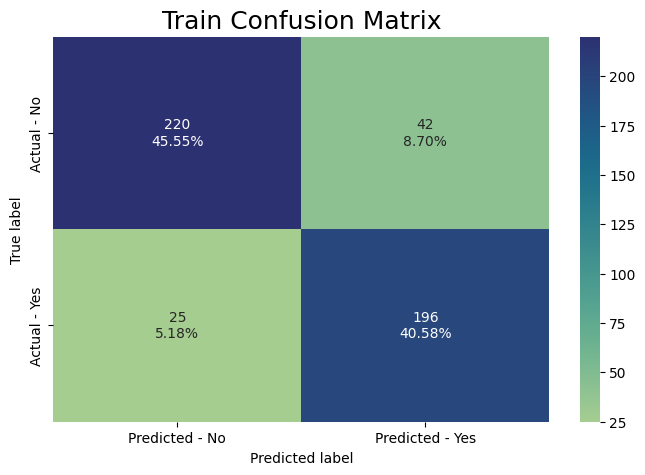

In [ ]:
confusion_matrix_plot(y_train, y_pred_train)

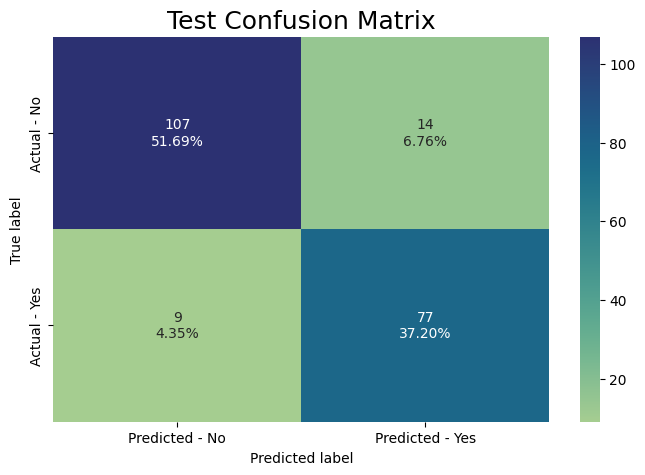

In [ ]:
confusion_matrix_plot(y_test, y_pred_test, dataset='Test')

In [ ]:
train_scores = [log.score(X_train[features],y_train)]
test_scores = [log.score(X_test[features],y_test)]
models = ['log']
score_dict = {
    'train_scores':train_scores,
    'test_scores':test_scores
}
pd.DataFrame(score_dict, index=models)


,train_scores,test_scores
log,0.861284,0.888889


Error analysis

In [ ]:
X_train['y_pred_train'] = y_pred_train
X_train['y_train'] = y_train
X_test['y_pred_test'] = y_pred_test
X_test['y_test'] = y_test

In [ ]:
X_train[(X_train['y_train']==0) & (X_train['y_pred_train']==1)].groupby(['y_train', 'y_pred_train']).mean()

,,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Gender_0,...,Industry_Materials,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White
y_train,y_pred_train,,,,,,,,,,,,,,,,,,,,,
0,1,33.483095,5.142857,0.738095,2.868214,1.0,0.357143,1.166667,0.52381,107.97619,0.285714,...,0.142857,0.047619,0.02381,0.0,0.02381,0.095238,0.238095,0.02381,0.02381,0.619048


In [ ]:
X_train.groupby(['y_pred_train']).mean()

,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Gender_0,...,Industry_Real Estate,Industry_Research,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,y_train
y_pred_train,,,,,,,,,,,,,,,,,,,,,
0,29.224735,3.525061,0.710204,0.946102,0.093878,0.183673,0.469388,0.469388,145.497959,0.277551,...,0.048980,0.008163,0.004082,0.016327,0.065306,0.130612,0.110204,0.040816,0.653061,0.102041
1,33.751345,6.238487,0.836134,3.198887,1.000000,0.676471,4.176471,0.449580,502.168067,0.352941,...,0.029412,0.012605,0.008403,0.084034,0.088235,0.285714,0.021008,0.037815,0.567227,0.823529


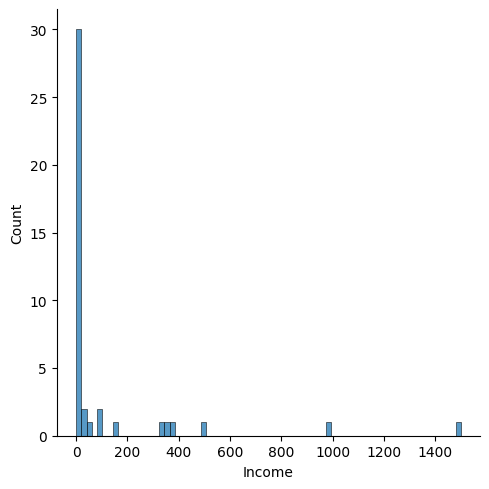

In [ ]:
sns.displot(data=X_train[(X_train['y_train']==0) & (X_train['y_pred_train']==1)]['Income'])

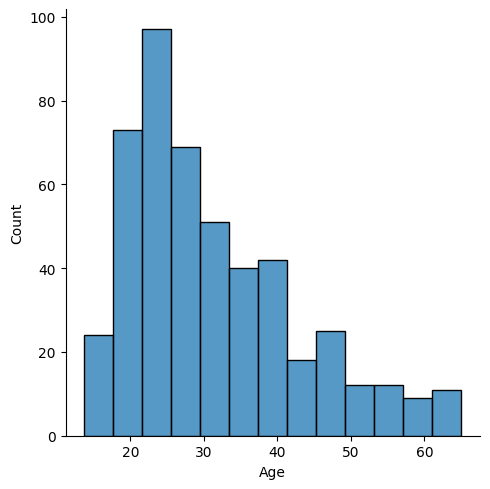

In [ ]:
sns.displot(data=X_train['Age'])

**Observations**
*   most pronunced difference is when age is higher. 40 and above
*   also much more of the errors we are concerned about had shown prior defaults.
*   slightly more genders as 0





**Classification Report**

In [ ]:
from yellowbrick.classifier import ClassificationReport

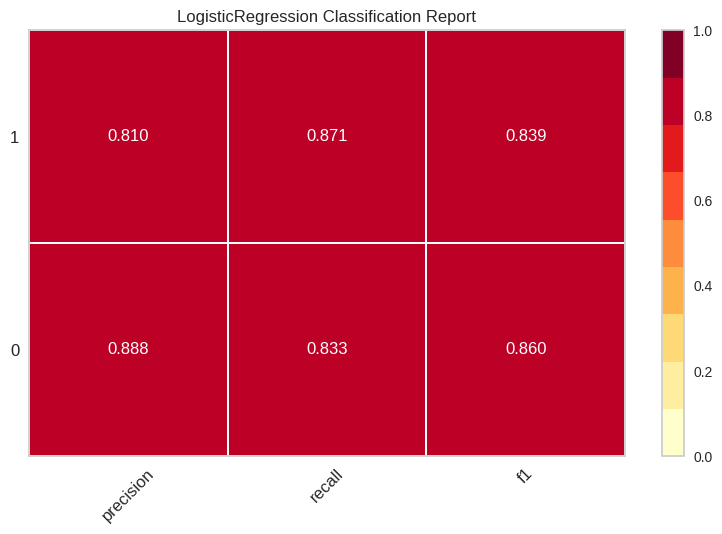

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
visualizer = ClassificationReport(log)
visualizer.fit(X_train[features], y_train)
visualizer.score(X_test[features], y_test)
visualizer.show()

ROCAUC

In [ ]:
from yellowbrick.classifier import ROCAUC

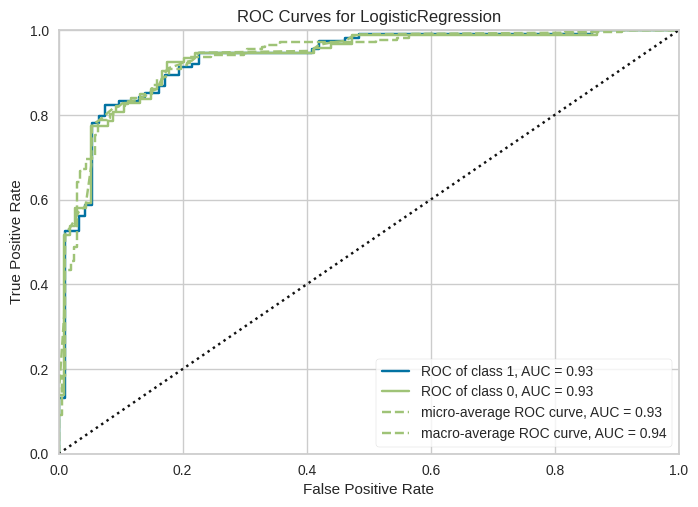

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(log, classes=[1,0])
visualizer.fit(X_train[features], y_train)
visualizer.score(X_test[features], y_test)
visualizer.show()

Precision Recall Curve

In [ ]:
from yellowbrick import classifier

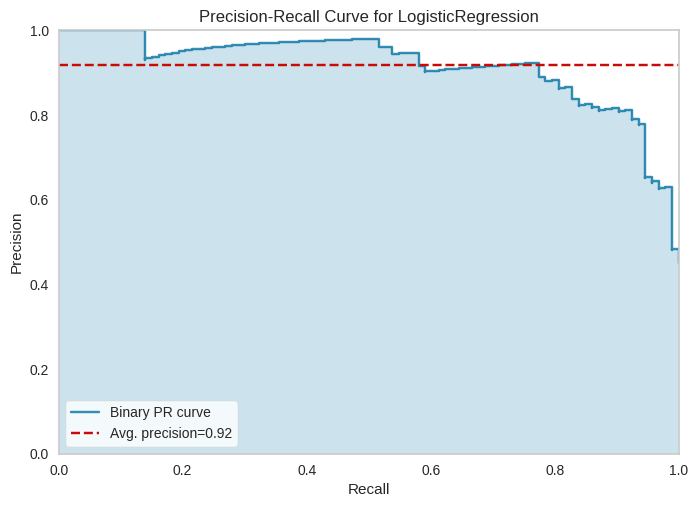

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
visualizer = classifier.PrecisionRecallCurve(log)
visualizer.fit(X_train[features], y_train)
visualizer.score(X_test[features], y_test)
visualizer.show()

**Descrimination Threshold**

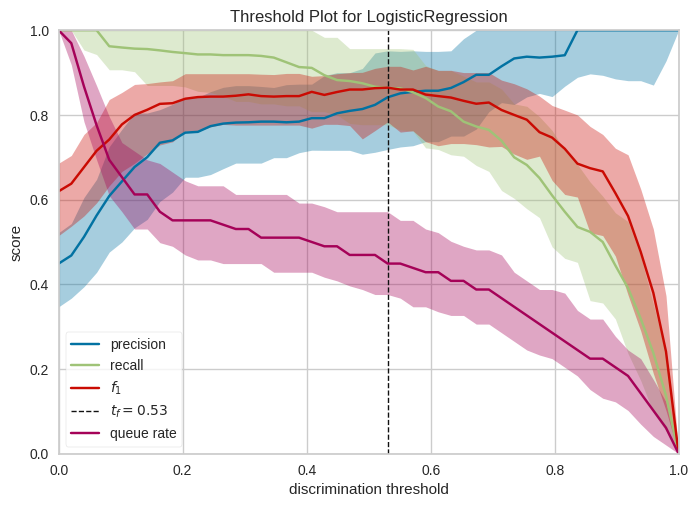

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
vis = classifier.DiscriminationThreshold(log, classes=[1,0])
vis.fit(X_train[features], y_train)
vis.score(X_test[features], y_test)
vis.show()

# Engineering another feature
Age over 40

In [ ]:
def age_over(x):
  if x > 50:
    value = 1
  else:
    value = 0
  return value

In [ ]:
df['Age_over40'] = df['Age'].apply(age_over)

# **Gender Income Cross**

In [ ]:
df['gender0_income'] = df['Gender_0'] * df['Income']
df['gender1_income'] = df['Gender_1'] * df['Income']

Gender Age over 40 cross

In [ ]:
df['gender0_over40'] = df['Gender_0'] * df['Age_over40']
df['gender1_over40'] = df['Gender_1'] * df['Age_over40']

Income equal to 0

In [ ]:
def income_zero(x):
  if x < 200:
    value = 1
  else:
    value =0
  return value

In [ ]:
df['income_0'] = df['Income'].apply(income_zero)

# 2nd train test split

In [ ]:
features = ['Age', 'Debt', 'BankCustomer', 'YearsEmployed', 'PriorDefault',
       'Employed', 'CreditScore', 'DriversLicense',  'Income',#'ZipCode',
       'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White',
       'Age_over40', 'gender0_income', 'gender1_income',
        'gender0_over40','gender1_over40',
       'income_0'
       ]
target = ['Approved']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
log = LogisticRegression().fit(X_train, y_train)

In [ ]:
score_train2 = log.score(X_train,y_train)
score_test2 = log.score(X_test,y_test)

# Summary

In [ ]:
scores_train = [score_train, score_train2]
scores_test = [score_test, score_test2]
model = ['normal', 'version2']
score_dict = {
    'score_train':scores_train,
    'score_test':scores_test
}
df_score = pd.DataFrame(score_dict, index=model)
df_score

,score_train,score_test
normal,0.867495,0.850242
version2,0.871636,0.830918


In [ ]:
y_pred_test2 = log.predict(X_test)

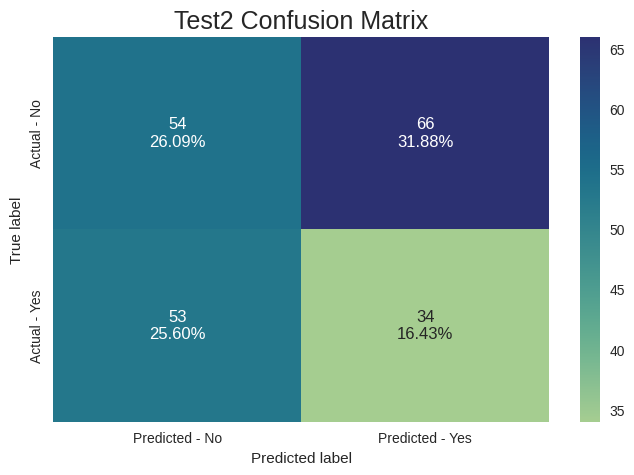

In [ ]:
confusion_matrix_plot(y_test, y_pred_test, dataset='Test2')

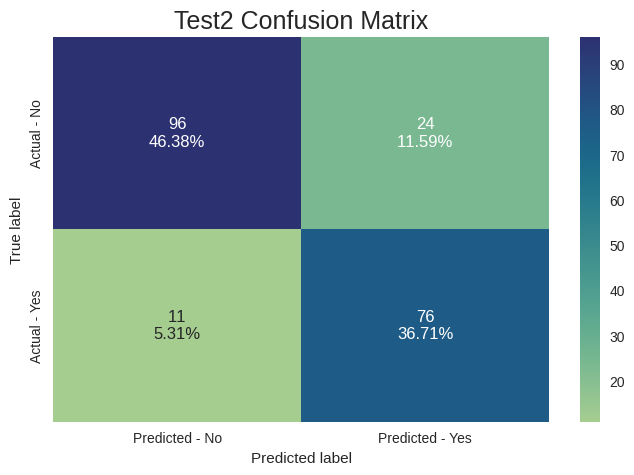

In [ ]:
confusion_matrix_plot(y_test, y_pred_test2, dataset='Test2')